# 2. Machine Learning (Titanic)

## ***1. Set up***

### **1.1. Import some libraries**

**Import the data from the csv file and save it in a dataframe named df.**

In [1]:
import pandas as pd
from numpy.random import randint
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid")
sns.set_context("poster")

In [39]:
df=pd.read_csv('data/titanic/titanic_ml.csv', index_col=0)
df.head()


,PassengerId,Pclass,Age,SibSp,Parch,Fare,sex_lab,embarked_lab,family,socio,Deck_B,Deck_C,Deck_D,Deck_E,Deck_other,Survived
0,1,3,22.0,1,0,7.2500,0,1.0,1,6,0,0,0,0,0,0
1,2,1,38.0,1,0,71.2833,1,2.0,1,2,0,1,0,0,0,1
2,3,3,26.0,0,0,7.9250,1,1.0,0,3,0,0,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,1.0,1,2,0,1,0,0,0,1
4,5,3,35.0,0,0,8.0500,0,1.0,0,3,0,0,0,0,0,0


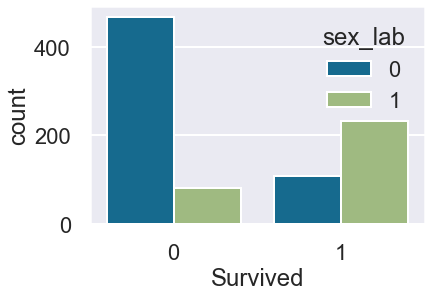

In [40]:
sns.countplot(x='Survived', hue='sex_lab', data=df)

### **1.3. Define the target**

**Split the data between features and target.**

In [5]:
X=df.iloc[:,1:-1]
y=df.iloc[:,-1]

y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

**Visualise the target depending on the sex.**

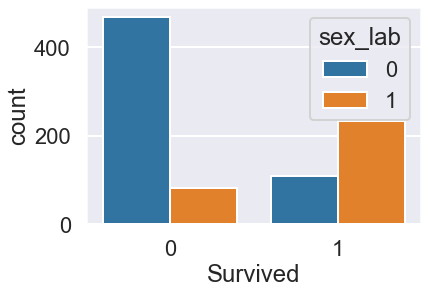

In [6]:
sns.countplot(x='Survived', hue='sex_lab', data=df)

**Visualise the target depending on the Pclass.**

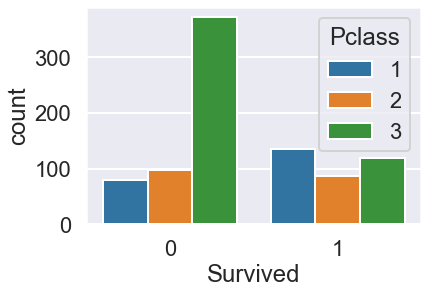

In [7]:
sns.countplot(x='Survived', hue='Pclass', data=df)

### **1.4. Training and testing sets**

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
#**Split the features and the target to get a train and a test set.**

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=8)

**Cross validation**

# 5. XGBoost

In [12]:
pip install xgboost

In [13]:
import xgboost as xgb
import numpy as np

X.head(5)

,Pclass,Age,SibSp,Parch,Fare,sex_lab,embarked_lab,family,socio,Deck_B,Deck_C,Deck_D,Deck_E,Deck_other
0,3,22.0,1,0,7.2500,0,1.0,1,6,0,0,0,0,0
1,1,38.0,1,0,71.2833,1,2.0,1,2,0,1,0,0,0
2,3,26.0,0,0,7.9250,1,1.0,0,3,0,0,0,0,0
3,1,35.0,1,0,53.1000,1,1.0,1,2,0,1,0,0,0
4,3,35.0,0,0,8.0500,0,1.0,0,3,0,0,0,0,0


In [16]:
# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(objective='binary:logistic')

In [17]:
#%%timeit
# Fit the classifier to the training set
xg_cl.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [18]:
# Predict the labels of the test set: preds
y_pred = xg_cl.predict(X_test)

In [19]:
xg_cl.score(X_test, y_test)

0.8435754189944135

## **Cross validation**

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['Died', 'Survived']))

              precision    recall  f1-score   support

        Died       0.85      0.90      0.88       110
    Survived       0.83      0.75      0.79        69

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



In [21]:
from sklearn.model_selection import cross_val_score

scores_xgb = cross_val_score(xg_cl, X, y, cv=5)
print('scores:', scores_xgb)
print('mean:', scores_xgb.mean())


scores: [0.76536313 0.81460674 0.85393258 0.78651685 0.86516854]
mean: 0.8171175695185487


### **3.2 Parameter Tuning**

In [22]:
from sklearn.model_selection import GridSearchCV

params = {'learning_rate':[ 0.1, 0.3],
          'n_estimators': [100,251],
           'max_depth': [3, 5],
         'subsample':[0.7,0.8,]}



In [23]:
grid_search=GridSearchCV(xg_cl, params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
         

In [24]:
grid_search.best_score_

0.8286614793657048

In [25]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.7}

In [26]:
model = xgb.XGBClassifier(objective='binary:logistic',learning_rate= 0.1, max_depth= 3, n_estimators=100, subsample=0.8)

model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [27]:
# Predict the labels of the test set: preds
preds = model.predict(X_test)

In [28]:
model.score(X_test, y_test)

0.8659217877094972

In [29]:
 from sklearn.metrics import confusion_matrix
    
cm = confusion_matrix(y_test, preds)

cm

array([[101,   9],
       [ 15,  54]], dtype=int64)

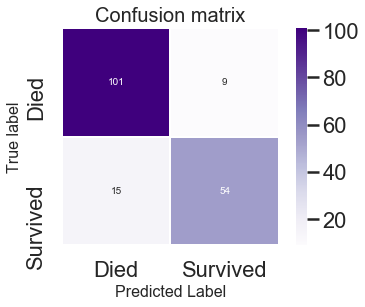

In [24]:
# Plotting the Confusion Matrix
def plot_cm(matrix, labels):      
        sns.heatmap(matrix, annot = True, fmt='d', xticklabels = labels, yticklabels = labels,
                    square = True, linewidths=1, cmap = 'Purples')
        plt.xlabel('Predicted Label', fontsize=16)
        plt.ylabel('True label', fontsize=16)
        plt.title('Confusion matrix', fontsize=20)
        plt.show()
        
plot_cm(cm, ['Died', 'Survived'])

F1 Score is the Harmonic Mean between precision and recall.
$$F_1 = 2 \times \frac{1}{\frac{1}{Precision} + \frac{1}{Recall}}$$  
  
F1 Score tries to find the balance between precision and recall.
$$Precision = \frac{True\ Positives}{True\ Positives\ +\ False\ Positives}$$  
  
$$Recall = \frac{True\ Positives}{True\ Positives\ +\ False\ Negatives}$$
https://en.wikipedia.org/wiki/Precision_and_recall

In [33]:
from yellowbrick import ROCAUC

C:\Users\black\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


**Create a visualizer.**  
**Fit the training data to the visualizer, evaluate the model on the test data and draw the ROC curve.**

C:\Users\black\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


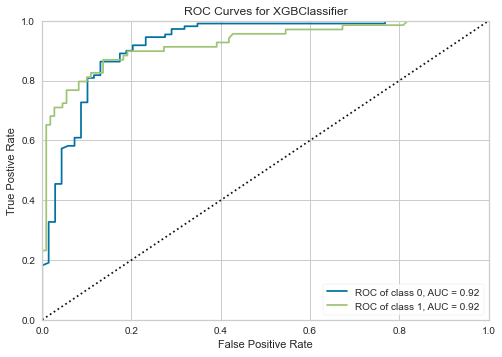

In [34]:
auc = ROCAUC(model, micro=False, macro=False)

auc.fit(X_train, y_train)
auc.score(X_test, y_test)
auc.poof() 

In [35]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [36]:
@interact(learn_rate=(0.1,1,0.1), depth=(1,5,1), estimators=(1,500,1), subsample=(0.1,1,0.1))
def f(learn_rate,depth,estimators,subsample):
    model2 = xgb.XGBClassifier(objective='binary:logistic',learning_rate= learn_rate, max_depth= depth, n_estimators=estimators,
                               subsample=subsample)
    model2.fit(X_train,y_train)
    
    preds = model2.predict(X_test)
    
    auc = ROCAUC(model2, micro=False, macro=False)

    auc.fit(X_train, y_train)
    auc.score(X_test, y_test)
    
    cm = confusion_matrix(y_test, preds)

    
    
    # Plotting the Confusion Matrix
    def plot_cm(matrix, labels):      
        sns.heatmap(matrix, annot = True, fmt='d', xticklabels = labels, yticklabels = labels,
                    square = True, linewidths=0.5, cmap = 'Purples')
        plt.xlabel('Predicted Label', fontsize=16)
        plt.ylabel('True label', fontsize=16)
        plt.title('Confusion matrix', fontsize=20)
        #plt.show()
        

    
    
    
    return   auc.poof(), model2.score(X_test, y_test), plot_cm(cm, ['Died', 'Survived'])
 
    

interactive(children=(FloatSlider(value=0.5, description='learn_rate', max=1.0, min=0.1), IntSlider(value=3, d…

## More control over the user interface: `interactive_output`

`interactive_output` provides additional flexibility: you can control how the UI elements are laid out.

Unlike `interact`, `interactive`, and `interact_manual`, `interactive_output` does not generate a user interface for the widgets. This is powerful, because it means you can create a widget, put it in a box, and then pass the widget to `interactive_output`, and have control over the widget and its layout.

In [37]:
from IPython.display import display

learn_rate = widgets.FloatSlider(min=0.1,max=1,continuous_update=False)
depth = widgets.IntSlider(min=1,max=5,continuous_update=False)
estimators = widgets.IntSlider(min=100,max=300,continuous_update=False)
subsample=widgets.FloatSlider(min=0.1,max=1,continuous_update=False)


# An HBox lays out its children horizontally
ui = widgets.HBox([learn_rate, depth, estimators, subsample])


def f(learn_rate,depth,estimators,subsample):
    model2 = xgb.XGBClassifier(objective='binary:logistic',learning_rate= learn_rate, max_depth= depth, n_estimators=estimators,
                               subsample=subsample)
    model2.fit(X_train,y_train)
    
    preds = model2.predict(X_test)
    
    auc = ROCAUC(model2, micro=False, macro=False)

    auc.fit(X_train, y_train)
    auc.score(X_test, y_test)
    
    cm = confusion_matrix(y_test, preds)

        
    # Plotting the Confusion Matrix
    def plot_cm(matrix, labels):      
        sns.heatmap(matrix, annot = True, fmt='d', xticklabels = labels, yticklabels = labels,
                    square = True, linewidths=1, cmap = 'Purples')
        plt.xlabel('Predicted Label', fontsize=16)
        plt.ylabel('True label', fontsize=16)
        plt.title('Confusion matrix', fontsize=20)
        #plt.show()
            
    
    return   auc.poof(), model2.score(X_test, y_test), plot_cm(cm, ['Died', 'Survived'])




out = widgets.interactive_output(f, {'learn_rate': learn_rate, 'depth': depth, 'estimators': estimators,'subsample': subsample})

display(ui, out)

Output()